In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('SampleSuperstore.csv')
df.head(20)
np.set_printoptions(suppress=True)

In [2]:
df.head(20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
df2=df.State.value_counts(ascending=False ,normalize=True)
df2=df2.reset_index()
df2.columns=['state','Totalorders']
aggregate = df.groupby(['State'],as_index=False)[['Quantity','Sales','Discount','Profit']].sum()
aggregate=aggregate.sort_values(['Profit'], ascending = False)
aggregate=aggregate.reset_index(drop=True)

In [5]:
aggregate.head()

,State,Quantity,Sales,Discount,Profit
0,California,7667,457687.6315,145.6,76381.3871
1,New York,4224,310876.2710,62.4,74038.5486
2,Washington,1883,138641.2700,32.4,33402.6517
3,Michigan,946,76269.6140,1.8,24463.1876
4,Virginia,893,70636.7200,0.0,18597.9504


In [6]:
subcat_sales_profit = df.groupby(['Sub-Category'],as_index=False)[['Quantity','Sales','Discount','Profit']].sum()
print (subcat_sales_profit)

   Sub-Category  Quantity        Sales  Discount      Profit
0   Accessories      2976  167380.3180     60.80  41936.6357
1    Appliances      1729  107532.1610     77.60  18138.0054
2           Art      3000   27118.7920     59.60   6527.7870
3       Binders      5974  203412.7330    567.00  30221.7633
4     Bookcases       868  114879.9963     48.14  -3472.5560
5        Chairs      2356  328449.1030    105.00  26590.1663
6       Copiers       234  149528.0300     11.00  55617.8249
7     Envelopes       906   16476.4020     20.40   6964.1767
8     Fasteners       914    3024.2800     17.80    949.5182
9   Furnishings      3563   91705.1640    132.40  13059.1436
10       Labels      1400   12486.3120     25.00   5546.2540
11     Machines       440  189238.6310     35.20   3384.7569
12        Paper      5178   78479.2060    102.60  34053.5693
13       Phones      3289  330007.0540    137.40  44515.7306
14      Storage      3158  223843.6080     63.20  21278.8264
15     Supplies       64

In [7]:
from decimal import *
def p2s(x):
    getcontext().prec=2
    val = Decimal(x['Profit'])/Decimal(x['Sales'])
    return val

    

In [8]:
ps=subcat_sales_profit.apply(p2s,axis=1)


ps=pd.DataFrame(data=ps,columns=['ProfitSalesRatio'])


subcat_sales_profit=pd.concat([subcat_sales_profit,ps],axis=1)

In [9]:
print (subcat_sales_profit)

   Sub-Category  Quantity        Sales  Discount      Profit ProfitSalesRatio
0   Accessories      2976  167380.3180     60.80  41936.6357             0.25
1    Appliances      1729  107532.1610     77.60  18138.0054             0.17
2           Art      3000   27118.7920     59.60   6527.7870             0.24
3       Binders      5974  203412.7330    567.00  30221.7633             0.15
4     Bookcases       868  114879.9963     48.14  -3472.5560           -0.030
5        Chairs      2356  328449.1030    105.00  26590.1663            0.081
6       Copiers       234  149528.0300     11.00  55617.8249             0.37
7     Envelopes       906   16476.4020     20.40   6964.1767             0.42
8     Fasteners       914    3024.2800     17.80    949.5182             0.31
9   Furnishings      3563   91705.1640    132.40  13059.1436             0.14
10       Labels      1400   12486.3120     25.00   5546.2540             0.44
11     Machines       440  189238.6310     35.20   3384.7569    

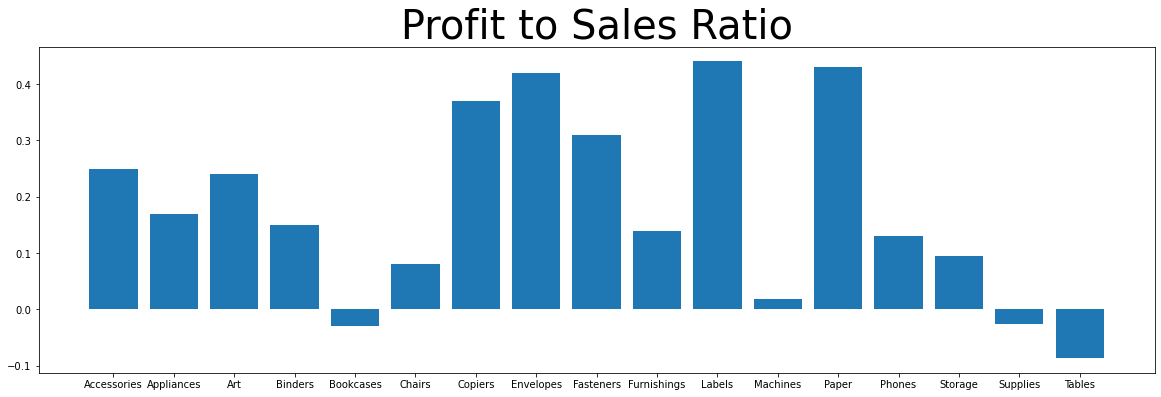

In [10]:
fig=plt.figure(figsize=(20,6))
plt.bar(subcat_sales_profit['Sub-Category'],subcat_sales_profit['ProfitSalesRatio'])
plt.title("Profit to Sales Ratio",fontsize=40)
plt.show()

# ProfitSales Ratio Shows Amount Of Profit Per Value of Sale of Good 


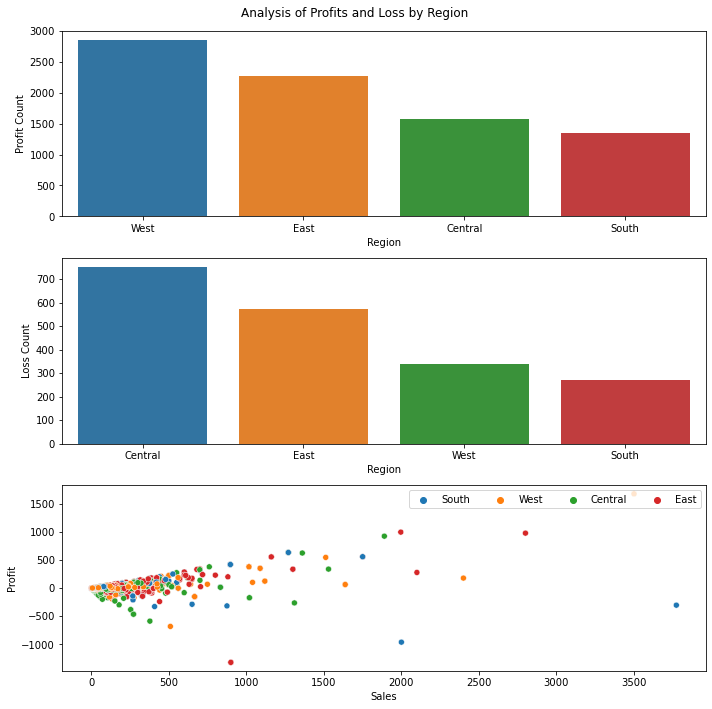

In [11]:
fig2,axes= plt.subplots(3,1,figsize=(10,10),squeeze=False)
X=df['Profit']/df['Quantity']>0
X=df.loc[X,'Region']
X=X.value_counts()
Y=df['Profit']/df['Quantity']<=0
Y=df.loc[Y,'Region']
Y=Y.value_counts()
fig2.suptitle("Analysis of Profits and Loss by Region ")
sns.barplot(x= X.index,y=X,ax=axes[0][0])
sns.barplot(ax=axes[1][0],x=Y.index,y=Y)

sns.scatterplot(ax=axes[2][0],x=df['Sales']/df['Quantity'],y=(df['Profit']/df['Quantity']), data=df, hue='Region')
axes[0][0].set(xlabel="Region", ylabel="Profit Count")
axes[1][0].set(xlabel="Region", ylabel="Loss Count")
axes[2][0].set(xlabel="Sales", ylabel="Profit")
plt.legend(loc="upper right",ncol=5)
plt.tight_layout()
plt.show()

# We can see from abpve graph region with most profit has most lost as well overall profit count is much higher than loss count

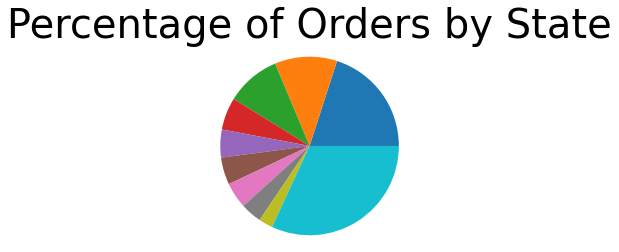

In [12]:
fig3=plt.figure(4,figsize=(4,8))
ax=fig3.add_subplot(211)
ax.axis("equal")
pi =df2.Totalorders[:9]
left=df2.Totalorders[9:49].sum()
pi[9]=left
mylabel=['California','New York','Texas','Pennsylvania','Washington','Illinois','Ohio','Florida','Michigan','Others']
pie=ax.pie(pi,normalize=False)
ax2=fig2.add_subplot(212)
ax2.axis("off")
ax2.legend(pie[0],mylabel,loc="center",ncol=3)
ax.set_title("Percentage of Orders by State",fontsize=40)
plt.show()

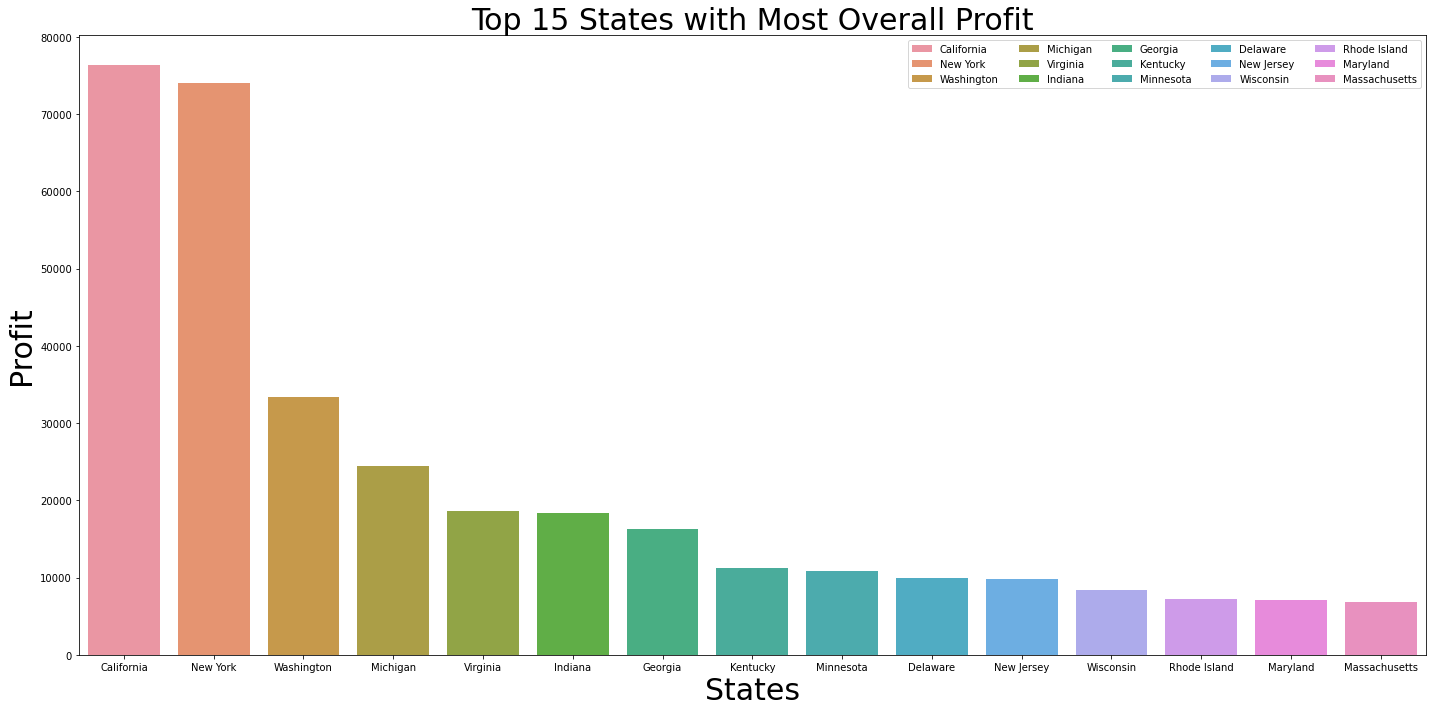

In [13]:
fig4=plt.figure(figsize=(20,10))
sns.barplot(x=aggregate['State'][:15],y=aggregate['Profit'][:15],data=aggregate,hue=aggregate["State"][:15],dodge=False)
plt.legend(loc="upper right",ncol=5)
plt.title("Top 15 States with Most Overall Profit",fontsize=30)
plt.xlabel("States",fontsize=30)
plt.ylabel("Profit",fontsize=30)
plt.tight_layout()
plt.show()



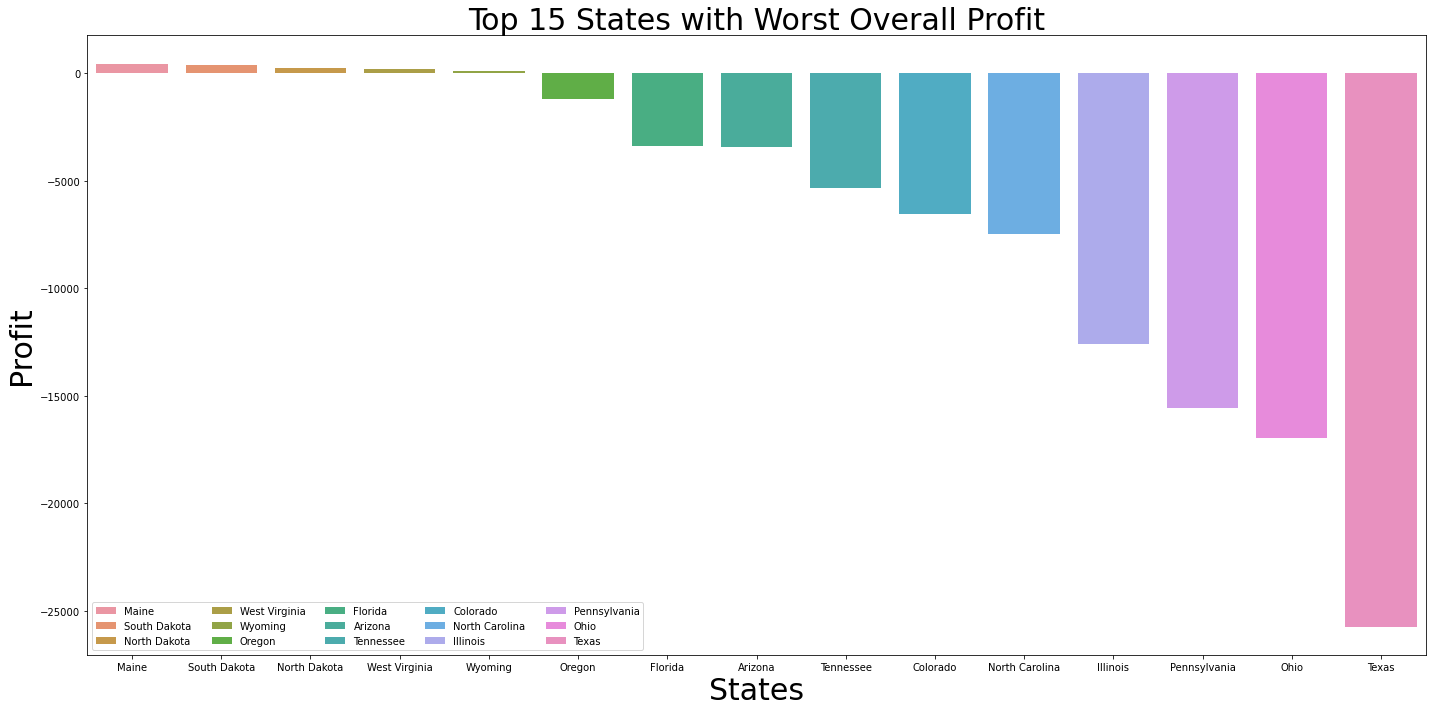

In [14]:
fig5=plt.figure(figsize=(20,10))
sns.barplot(x=aggregate['State'][-15:],y=aggregate['Profit'][-15:],data=aggregate,hue=aggregate["State"][-15:],dodge=False)
plt.legend(loc="lower left",ncol=5)
plt.title("Top 15 States with Worst Overall Profit",fontsize=30)
plt.xlabel("States",fontsize=30)
plt.ylabel("Profit",fontsize=30)
plt.tight_layout()
plt.show()

# California , New York and Washington are most profitable state while Texas, Ohio and Pennsylvania are most loss incurring State

In [15]:
df3=df.groupby(['State','Category','Sub-Category'],as_index=False)[['Sales','Quantity','Discount','Profit']].sum()
df3=df3.sort_values(['State','Sub-Category'])
df3=df3.reset_index(drop=True)

def calprice(y):
    getcontext().prec=4
    val =(Decimal(y['Sales']) - Decimal(y['Profit']))/ Decimal(y['Quantity'])
    return val
price=df3.apply(calprice,axis=1)
price=pd.DataFrame(data=price,columns=['Price'])
df3=pd.concat([df3,price],axis=1)
df3.head()


,State,Category,Sub-Category,Sales,Quantity,Discount,Profit,Price
0,Alabama,Technology,Accessories,2322.83,24,0.0,816.4346,62.75
1,Alabama,Office Supplies,Appliances,208.16,1,0.0,56.2032,152.0
2,Alabama,Office Supplies,Art,301.21,38,0.0,88.5344,5.597
3,Alabama,Office Supplies,Binders,466.82,41,0.0,227.7688,5.832
4,Alabama,Furniture,Chairs,3915.54,30,0.0,660.9664,108.5


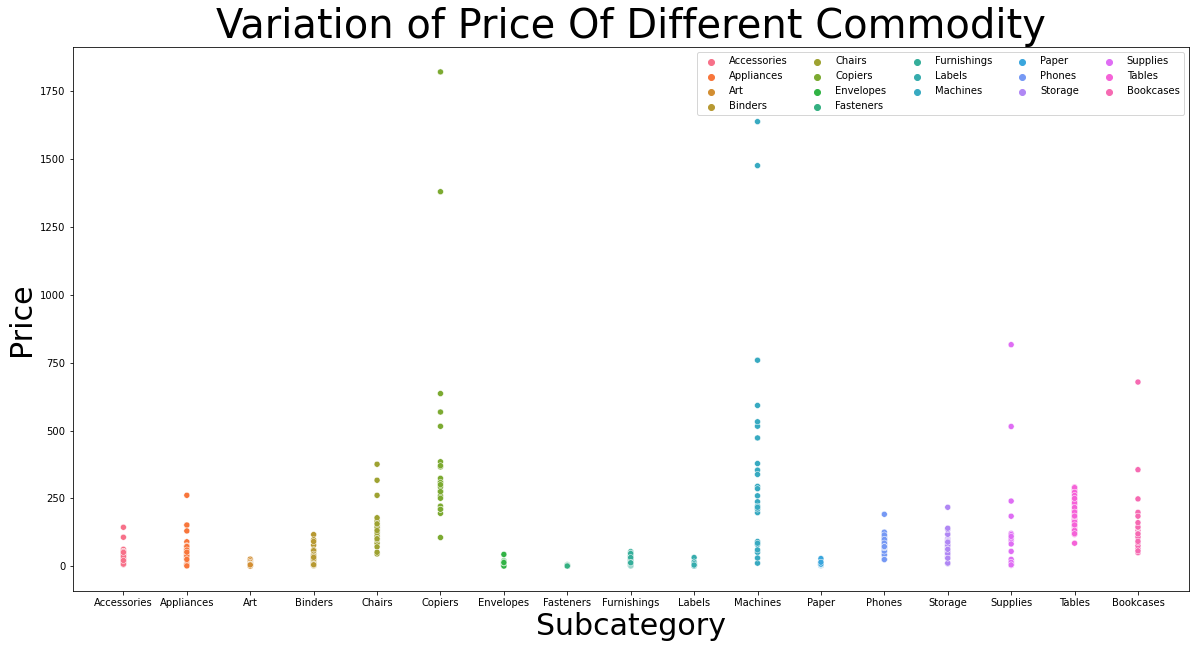

In [16]:
fig7= plt.figure(figsize=(20,10))
plt.title("Variation of Price Of Different Commodity",fontsize=40)
plt.ylabel("Price",fontsize=30)
plt.xlabel("Subcategory",fontsize=30)
sns.scatterplot(x='Sub-Category',y='Price', data=df3, hue='Sub-Category')
plt.legend(loc="upper right",ncol=5 , )
plt.show()

# From above graph we can see that their is huge discrepency in price of same commodity across different states 
# This may be due to logistic charges assuming that price and profit margin is kept same across all the states  

In [17]:
states = df3['State'].unique()
subcat=df3['Sub-Category'].unique()

rows=[]
for st in states:
    idex = df3['State']==st
    idex=np.where(idex)[0]
    for sub in subcat:
        idex2=df3['Sub-Category']==sub
        idex2 = np.where(idex2)[0]
        s=np.intersect1d(idex,idex2)
        if(s.size>0):
            rows=np.append(rows,df3['Quantity'].values[s])
        else:
            rows=np.append(rows,[0])

rows = rows.reshape(49,17)

df4=pd.DataFrame(rows)
df4.columns=subcat   
df4.index=states


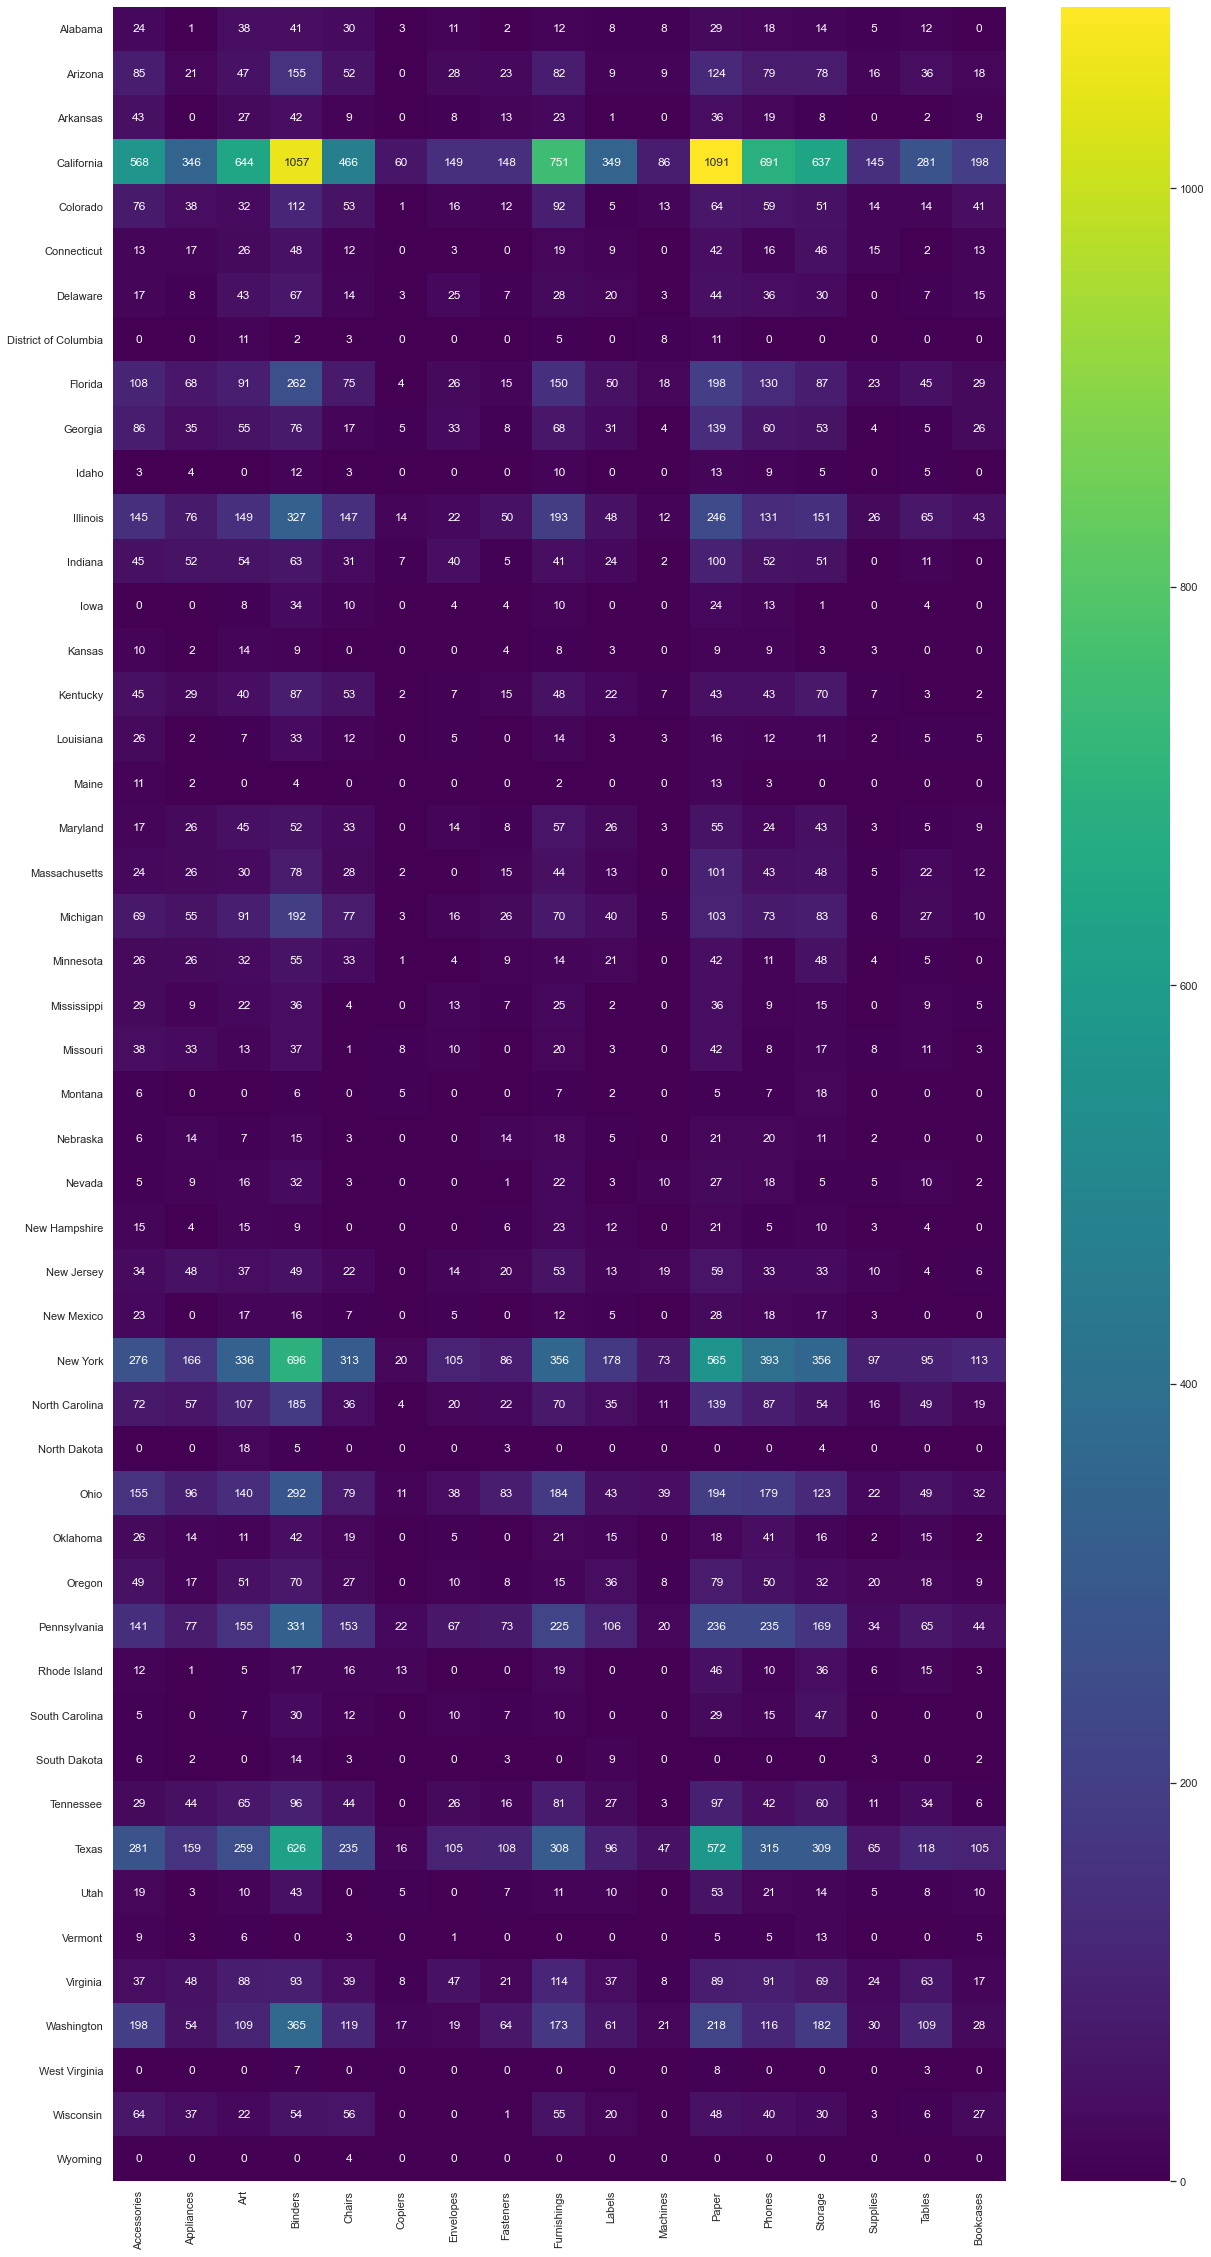

In [18]:
sns.set()
fig8 =plt.figure(figsize=(20,40))
sns.heatmap(df4,annot=True,fmt="g",cmap="viridis")
plt.show()

# Above Heatmap shows the quantity of product ordered by each state , this can help us to recommend the products in demand in each state and introduce our new products accordingly.

In [19]:
df3.sort_values(['Profit'])

,State,Category,Sub-Category,Sales,Quantity,Discount,Profit,Price
567,Texas,Office Supplies,Binders,9042.676,626,122.4,-14705.0738,37.94
464,Ohio,Technology,Machines,8978.238,39,5.6,-11770.9447,532.1
161,Illinois,Office Supplies,Binders,4538.546,327,64.0,-7204.3242,35.90
565,Texas,Office Supplies,Appliances,2407.814,159,37.6,-6147.2225,53.81
443,North Carolina,Technology,Machines,12620.655,11,2.0,-5384.8086,1637
...,...,...,...,...,...,...,...,...
283,Michigan,Office Supplies,Binders,22821.970,192,0.0,11079.5050,61.15
45,California,Technology,Accessories,37255.010,568,0.0,11095.6565,46.06
418,New York,Office Supplies,Binders,32456.912,696,35.8,11096.0260,30.69
428,New York,Technology,Phones,47502.620,393,0.0,13399.1892,86.77


Overall Result -
1. Region wise west region is most profitable while it has most loss but Profit count is way more.
2. California is most profitable state followed by New York and then washington.
3. Texas, ohio , pensilvania are worst performing state with overall most net loss.
4. Tables Supplies and bookcases are worst performing sub category with overall net loss.
5. Labels , Papers and envelops are best performing sub category with overall net profit.
6. Most loss occured in Technology and office supplies while most profit also occured in same category.It has to be noted that worst performing states performed worst in this category while its best performing in top earning statee 